<a href="https://colab.research.google.com/github/nahbos/AUT-Neural-Networks/blob/main/HW01/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Copyright (C) 2022 Sobhan Moradian Daghigh**
######**Date: 3/1/2022**

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import itertools

In [18]:
print(tf.__version__)

2.8.0


In [19]:
url = 'https://raw.githubusercontent.com/nahbos/AUT-Neural-Networks/main/HW01/Data/crx.data'
dataset = pd.read_csv(url, names=['A' + str(i) for i in range(1, 17)])
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [20]:
dataset = dataset.replace('?', np.NaN)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [21]:
nan_columns = dataset.columns[dataset.isnull().any()]

In [22]:
def fill_missing_values(dataset, nan_columns):
  for col in nan_columns:
    if dataset[col].dtypes == 'object':
      dataset[col] = dataset[col].fillna(dataset[col].value_counts().index[0])
    else:
      dataset[col] = dataset[col].fillna(dataset[col].mean(), inplace=True)
  return dataset

In [23]:
dataset = fill_missing_values(dataset, nan_columns)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [24]:
for col in dataset.columns:
  if dataset[col].dtypes == 'object':
    print(dataset[col].unique()[:5])

['b' 'a']
['30.83' '58.67' '24.50' '27.83' '20.17']
['u' 'y' 'l']
['g' 'p' 'gg']
['w' 'q' 'm' 'r' 'cc']
['v' 'h' 'bb' 'ff' 'j']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['00202' '00043' '00280' '00100' '00120']
['+' '-']


In [25]:
def label_encoder(dataset, col):
  encoder = preprocessing.LabelEncoder()
  dataset[col] = encoder.fit_transform(dataset.loc[:, col])
  return dataset

In [26]:
def encoder(dataset):
  conv_dataset = dataset.copy()
  for col in dataset.columns:
    if dataset[col].dtypes == 'object':
      try:
        conv_dataset[col] = pd.to_numeric(conv_dataset[col], downcast="float")
        print(' |_ {}: Str2Float'.format(col))

      except:
        print(' |_ {}: LabelEncoder'.format(col))
        conv_dataset = label_encoder(conv_dataset, col)

  return conv_dataset

In [27]:
conv_dataset = encoder(dataset)
conv_dataset.head()

 |_ A1: LabelEncoder
 |_ A2: Str2Float
 |_ A4: LabelEncoder
 |_ A5: LabelEncoder
 |_ A6: LabelEncoder
 |_ A7: LabelEncoder
 |_ A9: LabelEncoder
 |_ A10: LabelEncoder
 |_ A12: LabelEncoder
 |_ A13: LabelEncoder
 |_ A14: Str2Float
 |_ A16: LabelEncoder


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.830000,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.669998,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.500000,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.830000,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.170000,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_dataset = scaler.fit_transform(conv_dataset.iloc[:, :-1])
rescaled_dataset = pd.DataFrame(rescaled_dataset, columns=conv_dataset.columns[:-1])
rescaled_dataset[conv_dataset.columns[-1]] = conv_dataset.iloc[:, -1]
rescaled_dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1.0,0.256842,0.000000,0.5,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.0,0.1010,0.00000,0
1,0.0,0.675489,0.159286,0.5,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.0,0.0215,0.00560,0
2,0.0,0.161654,0.017857,0.5,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.0,0.1400,0.00824,0
3,1.0,0.211729,0.055000,0.5,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,1.0,0.0,0.0500,0.00003,0
4,1.0,0.096541,0.200893,0.5,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,0.0,1.0,0.0600,0.00000,0


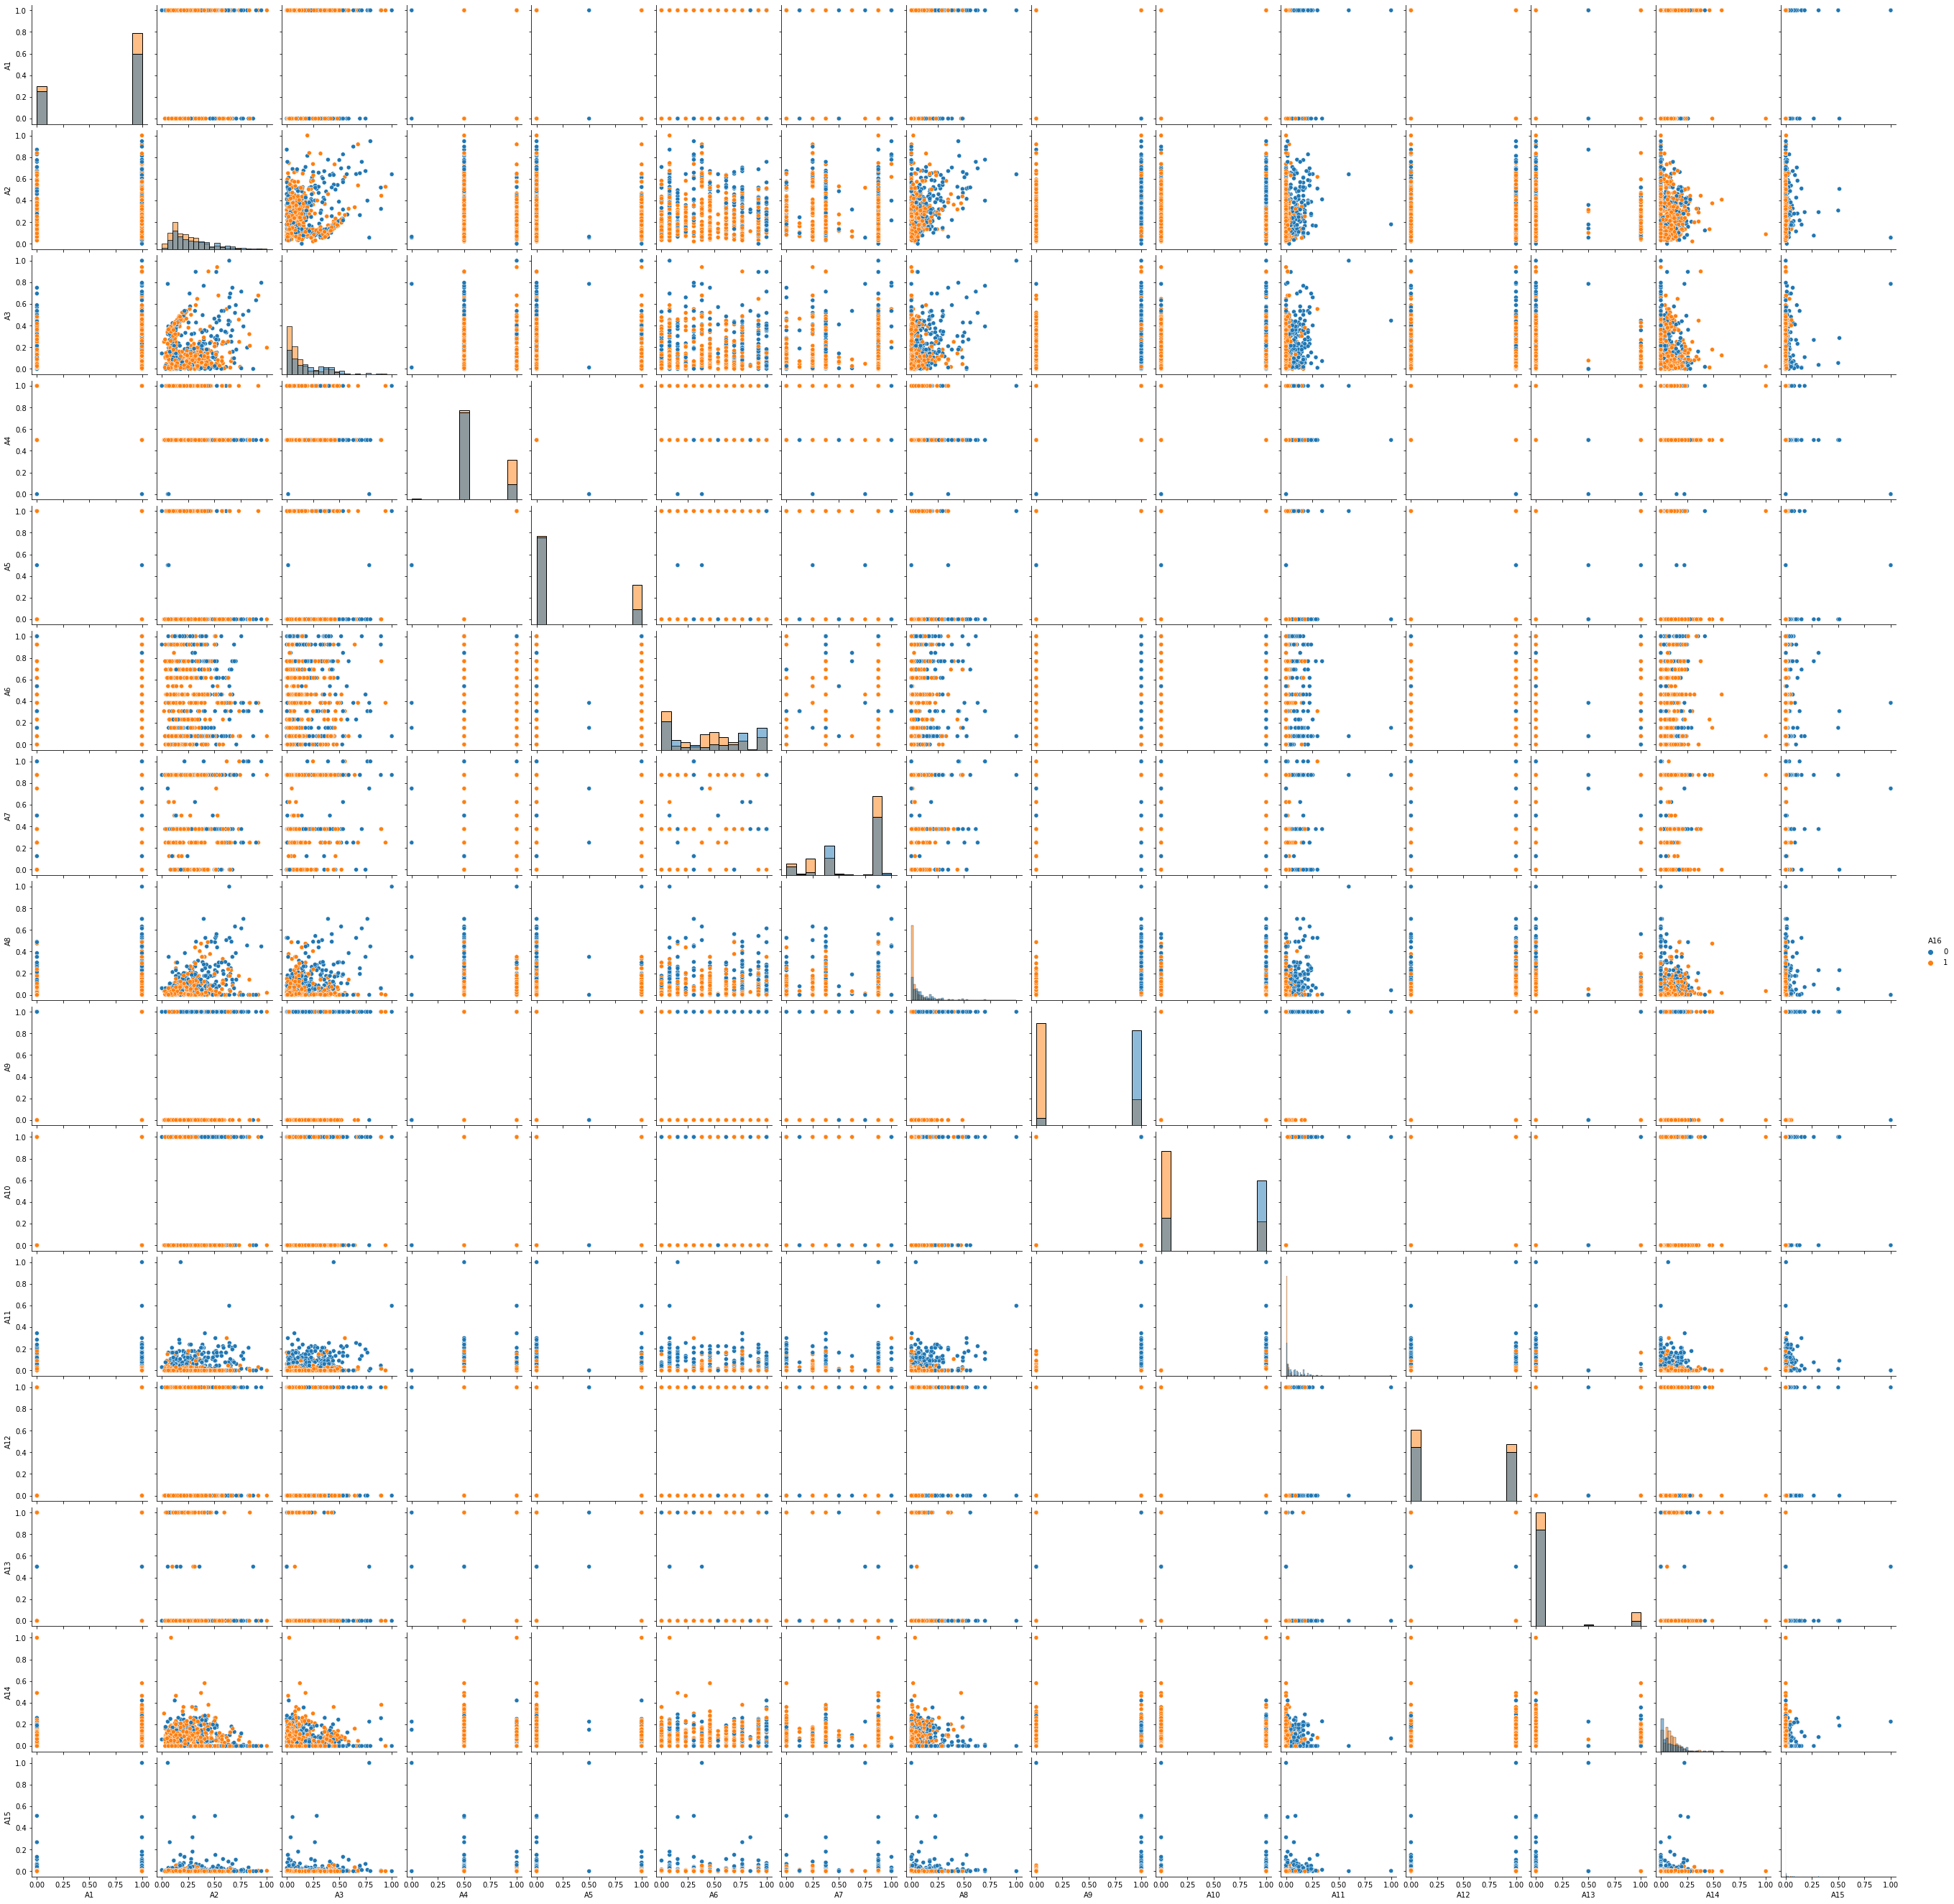

In [13]:
sns.pairplot(rescaled_dataset, hue=rescaled_dataset.columns[-1], diag_kind="hist")

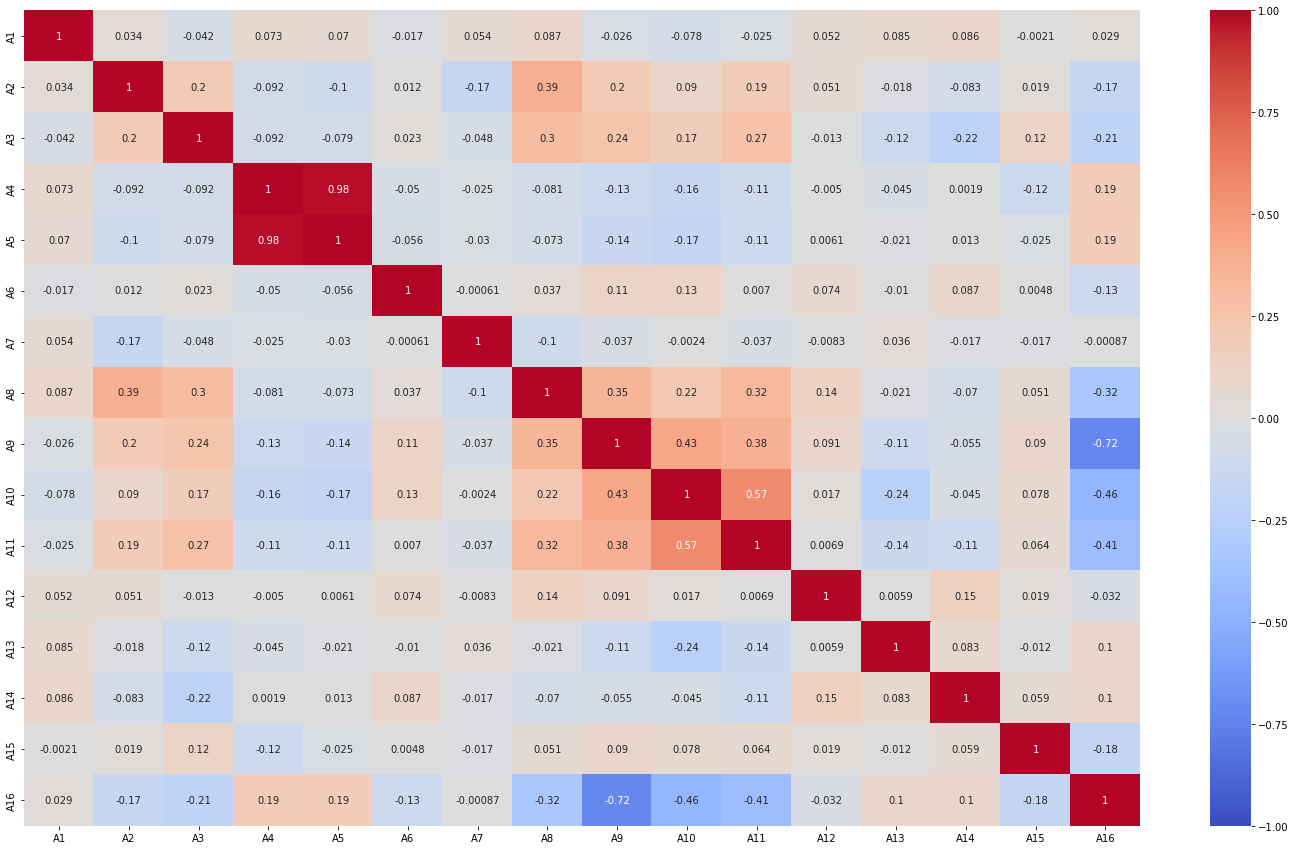

In [14]:
corrolation = rescaled_dataset.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(corrolation, cmap = 'coolwarm', vmin=-1, vmax=1, annot=True)

In [29]:
X_temp, X_test, y_temp, y_test = train_test_split(rescaled_dataset.iloc[:, :-1], rescaled_dataset.iloc[:, -1], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

In [30]:
X_train.shape

(483, 15)

In [31]:
X_test.shape

(138, 15)

In [32]:
X_val.shape

(69, 15)

In [134]:
model = keras.Sequential()
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [135]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [145]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/50
16/16 [==============================] - 0s 17ms/step - loss: 0.2539 - accuracy: 0.8944 - val_loss: 0.4437 - val_accuracy: 0.7826
Epoch 2/50
16/16 [==============================] - 0s 10ms/step - loss: 0.2538 - accuracy: 0.8986 - val_loss: 0.4409 - val_accuracy: 0.7826
Epoch 3/50
16/16 [==============================] - 0s 10ms/step - loss: 0.2525 - accuracy: 0.8965 - val_loss: 0.4460 - val_accuracy: 0.7826
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.2521 - accuracy: 0.8965 - val_loss: 0.4770 - val_accuracy: 0.7536
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.2506 - accuracy: 0.8986 - val_loss: 0.4509 - val_accuracy: 0.7971
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.2524 - accuracy: 0.8965 - val_loss: 0.4379 - val_accuracy: 0.7826
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 0.2533 - accuracy: 0.8965 - val_loss: 0.4542 - val_accuracy: 0.7826
Epoch 8/50
16/

In [146]:
model.summary()

Model: "sequential_524"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2108 (Dense)          (None, 15)                240       
                                                                 
 dense_2109 (Dense)          (None, 15)                240       
                                                                 
 dense_2110 (Dense)          (None, 15)                240       
                                                                 
 dense_2111 (Dense)          (None, 15)                240       
                                                                 
 dense_2112 (Dense)          (None, 2)                 32        
                                                                 
Total params: 992
Trainable params: 992
Non-trainable params: 0
_________________________________________________________________


In [147]:
# keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [148]:
test_lost, test_acc = model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 7ms/step - loss: 0.5653 - accuracy: 0.8116


In [163]:
def create_model(layers):
  model = keras.Sequential()

  for i, nodes in enumerate(layers):
    model.add(Dense(units=nodes, activation='relu'))
    model.add(Dropout(0.1))

  model.add(Dense(units=2, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [164]:
model = KerasClassifier(build_fn=create_model)

In [165]:
def create_layers(nodes, max_layers):
  layers = []
  for i in range(1, 1 << len(nodes)):
    subset = [nodes[j] for j in range(len(nodes)) if (i & (1 << j))]
    if len(subset) < max_layers:
      layers.append(subset)
  layers = [np.flip(np.sort(ele)).tolist() for ele in layers]
  layers.sort()
  layers = list(item for item, _ in itertools.groupby(layers))
  
  return layers      

In [166]:
max_layers = 4
nodes = list(range(10, 21, 2)) * (max_layers - 1)

layers = create_layers(nodes, max_layers)
parameters = dict(layers=layers)
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

In [167]:
grid.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Streaming output truncated to the last 5000 lines.
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.4987 - val_loss: 0.6808 - val_accuracy: 0.5797
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6859 - accuracy: 0.5142 - val_loss: 0.6552 - val_accuracy: 0.6812
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6490 - accuracy: 0.6667 - val_loss: 0.6370 - val_accuracy: 0.7246
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6126 - accuracy: 0.7158 - val_loss: 0.6276 - val_accuracy: 0.6377
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5890 - accuracy: 0.7287 - val_loss: 0.6158 - val_accuracy: 0.6377
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5691 - accuracy: 0.7674 - val_loss: 0.5931 - val_accuracy: 0.6957
Epoch 8/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5395 - accuracy: 0.7984 - val_loss:

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7efba9aad810>,
             param_grid={'layers': [[10], [10, 10], [10, 10, 10], [12],
                                    [12, 10], [12, 10, 10], [12, 12],
                                    [12, 12, 10], [12, 12, 12], [14], [14, 10],
                                    [14, 10, 10], [14, 12], [14, 12, 10],
                                    [14, 12, 12], [14, 14], [14, 14, 10],
                                    [14, 14, 12], [14, 14, 14], [16], [16, 10],
                                    [16, 10, 10], [16, 12], [16, 12, 10],
                                    [16, 12, 12], [16, 14], [16, 14, 10],
                                    [16, 14, 12], [16, 14, 14], [16, 16], ...]})

In [168]:
grid.best_params_

{'layers': [16, 16, 12]}

In [169]:
grid.best_score_

0.8818513631820679

In [170]:
grid.best_estimator_.score(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 5ms/step - loss: 0.4284 - accuracy: 0.8261


0.8260869383811951